In [44]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.model_selection import KFold, StratifiedKFold, validation_curve
from sklearn.model_selection import GroupKFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import VarianceThreshold, SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectFromModel, RFE, RFECV
from sklearn.linear_model import SGDClassifier
import pandas as pd
import numpy as np

#--------------chargement du jeu de données------------

iris = datasets.load_iris()
data, labels = iris.data, iris.target

#---------fonction KNN que j'ai faite---------------

#ca c'est quelque chose que j'ai pris sur internet,
#  pour sortir la valeur la plus fréquente dans une liste
def most_frequent(List):
    counter = 0
    num = List[0]
    for i in List:
        curr_frequency = List.count(i)
        if(curr_frequency> counter):
            counter = curr_frequency
            num = i
    return num



def my_knn(data_train, labels_train, k, valeur_test):
    liste = []
    liste_sortie = []
    k = 7
    v = valeur_test
    #pour chaque échantillon dans la data :
    #(ici pour la fonction chaque échantillon doit avoir 4 caractéristiques)
    #on calcule la distance de schewman (?) entre les caractéristiques du test 
    # et celles de tous elements de la base de donnée, on regroupe les longueurs dans une liste
    for i in range(len(data_train[:,0])):
        a = data_train[i]
        distance_va = ((a[0]-v[0])**4+(a[1]-v[1])**4+(a[2]-v[2])**4+(a[3]-v[3])**4)**(1/4)
        liste.append(distance_va)
    liste_k_index = np.sort(liste)
    #après avoir trié la liste pour obtenir les plus petits en premier,
    #on fait une boucle qui permet de choisir les k plus proches,
    #on trouve les index correspondants aux plus petites valeurs et on recherche les valeurs correspondantes dans
    #le label, ensuite on retourne la valeur la plus présente (ex 0, qui correspond à une espèce de fleur)
    for i in range(k):
        index = liste.index(liste_k_index[i])
        liste_sortie.append(labels_train[index])

    z = most_frequent(liste_sortie)  
    if (z == 0):
        print('setosa')
    elif (z == 1):
        print('versicolor')
    elif (z == 2):
        print('virginica')


my_knn(data, labels, 7, [4.7,3.2,1.3,.2])


my_knn(data, labels, 9, [6.2,2.2,4.5,1.5] )

setosa
versicolor


On regarde le meilleur modèle de classification sur la carte
https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html
Ici on veut faire de la classification avec les iris donc on va choisir KNN.

Ici, on définit notre train set et test set 

In [45]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2)
#normalisation des données
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.fit_transform(X_test)
print(X_train, X_train_norm)

[[5.5 2.4 3.7 1. ]
 [6.4 2.8 5.6 2.2]
 [6.7 3.3 5.7 2.5]
 [5.7 3.8 1.7 0.3]
 [5.6 2.7 4.2 1.3]
 [5.1 3.8 1.6 0.2]
 [4.9 3.1 1.5 0.2]
 [5.8 2.6 4.  1.2]
 [5.2 2.7 3.9 1.4]
 [4.4 2.9 1.4 0.2]
 [6.2 2.8 4.8 1.8]
 [5.1 3.5 1.4 0.3]
 [4.8 3.  1.4 0.1]
 [5.7 2.9 4.2 1.3]
 [6.5 3.  5.2 2. ]
 [5.5 2.3 4.  1.3]
 [6.  2.9 4.5 1.5]
 [4.9 2.4 3.3 1. ]
 [6.7 3.3 5.7 2.1]
 [6.1 3.  4.6 1.4]
 [6.  3.  4.8 1.8]
 [4.7 3.2 1.6 0.2]
 [6.6 2.9 4.6 1.3]
 [6.9 3.1 4.9 1.5]
 [5.  3.6 1.4 0.2]
 [6.4 2.7 5.3 1.9]
 [7.  3.2 4.7 1.4]
 [5.  3.5 1.6 0.6]
 [5.9 3.2 4.8 1.8]
 [5.1 3.5 1.4 0.2]
 [5.5 2.6 4.4 1.2]
 [6.1 3.  4.9 1.8]
 [7.2 3.2 6.  1.8]
 [6.3 3.4 5.6 2.4]
 [4.9 2.5 4.5 1.7]
 [6.2 2.2 4.5 1.5]
 [6.5 3.2 5.1 2. ]
 [4.8 3.4 1.6 0.2]
 [5.  2.3 3.3 1. ]
 [6.8 3.  5.5 2.1]
 [5.4 3.4 1.5 0.4]
 [5.1 3.3 1.7 0.5]
 [4.8 3.  1.4 0.3]
 [5.7 4.4 1.5 0.4]
 [5.7 2.8 4.1 1.3]
 [5.8 4.  1.2 0.2]
 [4.8 3.1 1.6 0.2]
 [6.4 3.2 5.3 2.3]
 [6.  2.2 5.  1.5]
 [5.5 2.4 3.8 1.1]
 [5.7 3.  4.2 1.2]
 [6.7 3.  5.2 2.3]
 [4.6 3.2 1.

Ceci est le modèle de base pour faire de l'apprentissage supervisé

In [46]:
model = KNeighborsClassifier()
model.fit(X_train_norm, y_train)
model.predict(X_train)
model.score(X_test_norm, y_test)

0.9666666666666667

On veut déterminer quels sont les meilleurs paramètres du modèle KNN, avec la fonction GridSearchCV.

In [51]:
param_grid = {'n_neighbors': np.arange(1,20),
                'metric' : ['euclidean', 'manhattan']}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train_norm, y_train)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)
model = grid.best_estimator_

print(model.score(X_test_norm, y_test))

0.95
{'metric': 'euclidean', 'n_neighbors': 1}
KNeighborsClassifier(metric='euclidean', n_neighbors=1)
0.9666666666666667


In [53]:
confusion_matrix(y_test, model.predict(X_test_norm))


array([[ 9,  0,  0],
       [ 0, 12,  0],
       [ 0,  1,  8]])

On voit que le modèle s'est trompé une fois, la fleur était l'espèce n°3 et elle fut prédite en tant que n°2.


Maintenant regardons quel est la meilleure répartition train set et test set possible avec learning_curve

[[ 23.75         1.           0.88333333]
 [ 30.           1.           0.90833333]
 [ 37.5          1.           0.90833333]
 [ 43.75         1.           0.925     ]
 [ 51.25         1.           0.95      ]
 [ 57.5          1.           0.95      ]
 [ 65.           1.           0.95833333]
 [ 71.25         1.           0.96666667]
 [ 78.75         1.           0.95833333]
 [ 85.           1.           0.95833333]
 [ 92.5          1.           0.95833333]
 [ 98.75         1.           0.95833333]
 [106.25         1.           0.95833333]
 [112.5          1.           0.95833333]
 [120.           1.           0.95      ]]


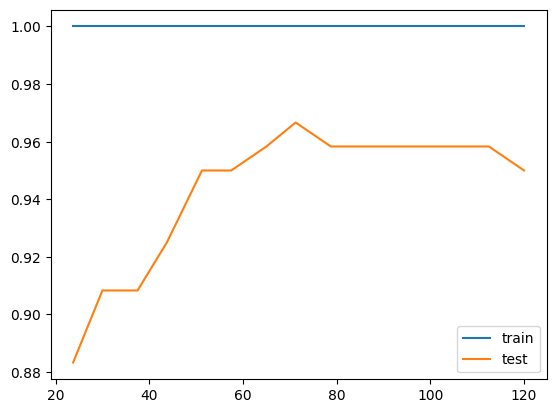

In [57]:
N, train_score, test_score = learning_curve(estimator = model, X = X_train_norm, y = y_train, 
train_sizes = np.linspace(0.2, 1.0, 15), cv = 5)
train = train_score.mean(axis = 1)
test = test_score.mean(axis = 1)
comparatif = np.zeros((15, 2))
comparatif[:,0], comparatif[:,1] = train, test
comparatif = np.c_[comparatif, np.zeros(15)]
comparatif[:,2], comparatif[:,1] = comparatif[:,1], comparatif[:,0]
comparatif[:,0] = N/0.8 #pour retrouver les valeurs X_train

print(comparatif)

plt.plot(comparatif[:,0], comparatif[:,1], label = "train")
plt.plot(comparatif[:,0], comparatif[:,2], label = "test")
plt.legend()

J'ai organisé mes données dans un tableau numpy pour que ca soit plus lisible, et j'ai fait un plot de l'ensemble, on voit donc que on obtient le modèle le plus performant avec 70 échantillons en train_set, avec un maximum de 96% d'exactitude

Preprocessing.
On veut normaliser les données

array([[ 0.17142707,  0.80794883,  0.37580157,  0.46476846],
       [ 0.17142707, -0.7814587 ,  0.71743936,  0.46476846],
       [ 2.4705666 ,  1.7161817 ,  1.45765457,  0.98357976],
       [-0.43360965, -1.00851692,  0.31886194, -0.05404284],
       [ 1.01847848,  0.12677417,  0.31886194,  0.20536281],
       [-0.07058762, -0.7814587 ,  0.14804304, -0.3134485 ],
       [ 2.10754457, -0.10028405,  1.57153383,  1.11328259],
       [ 0.5344491 , -0.55440048,  0.71743936,  0.33506563],
       [ 0.5344491 , -1.68969158,  0.31886194,  0.07565998],
       [ 0.5344491 , -1.23557514,  0.60356009,  0.33506563],
       [ 1.13948582, -0.10028405,  0.94519788,  1.11328259],
       [ 0.77646379, -0.55440048,  0.4327412 ,  0.33506563],
       [ 1.01847848, -0.10028405,  0.77437899,  1.37268824],
       [-1.15965371,  0.12677417, -1.33238738, -1.48077393],
       [-1.03864637, -2.37086623, -0.19359475, -0.3134485 ],
       [-0.91763902,  1.48912348, -1.33238738, -1.09166545],
       [-1.4016684 ,  0.

In [ ]:

#plus le premier tableau est elevé, plus il y a
#  une dependance entre la variable x et y
#dans le 2eme tableau, on a les valeurs de probabilité ?

(array([ 10.81782088,   3.7107283 , 116.31261309,  67.0483602 ]),
 array([4.47651499e-03, 1.56395980e-01, 5.53397228e-26, 2.75824965e-15]))

In [ ]:

elector = SelectKBest(chi2, k=1)
selector.fit_transform(X, y)
selector.get_support()
selector = SelectFromModel(SGDClassifier(random_state = 0),
                            threshold = 'mean')
selector.fit_transform(X, y)
selector.get_support()



array([False, False,  True,  True])

In [ ]:
selector = RFECV(SGDClassifier(), step = 1, min_features_to_select = 2, cv = 5)

selector.fit(X, y)
print(selector.ranking_)
print(selector.grid_scores_.mean(axis=1))


[2 1 1 1]
[0.84666667 0.86666667 0.8       ]


/home/gdaume24/workspace/py-sql/.venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)
